# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [5]:
x = np.linspace(0, 5, 100) #0到5 中間切100個點
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100) #add noice

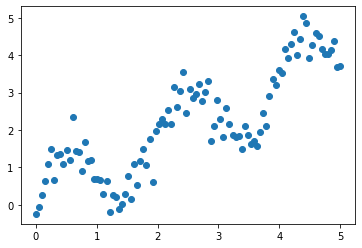

In [6]:
plt.scatter(x,y)

#### nonlinear

In [7]:
regr_lin = LinearRegression()

In [9]:
X = x.reshape(-1, 1) #轉成2D
print(X.shape)

(100, 1)


In [11]:
regr_lin.fit(X,y) #代表已經訓練好

LinearRegression()

0.5940669551458906


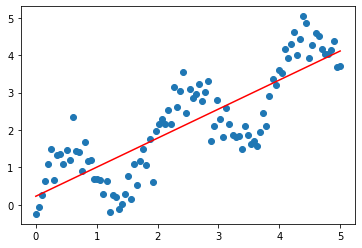

In [12]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r') #預測值
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [13]:
print(x.shape)

(100,)


In [14]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [15]:
regr_poly = LinearRegression()

In [16]:
regr_poly.fit(X_poly, y)

LinearRegression()

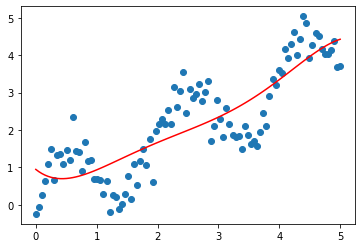

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [18]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.29868318  2.05062562 -0.94709879  0.19795478 -0.01492139]
interception:  0.9456773310626181


In [22]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #矩陣相乘注意維度

array([0.94567733, 0.8851972 , 0.83446419, 0.79279187, 0.75952354,
       0.73403164, 0.71571718, 0.70400912, 0.69836383, 0.69826444,
       0.7032203 , 0.71276638, 0.72646267, 0.74389361, 0.76466747,
       0.78841579, 0.81479281, 0.84347481, 0.8741596 , 0.9065659 ,
       0.94043271, 0.97551882, 1.01160212, 1.04847908, 1.08596411,
       1.12388903, 1.16210242, 1.20046909, 1.23886944, 1.27719891,
       1.31536737, 1.35329853, 1.39092937, 1.42820954, 1.46510078,
       1.50157631, 1.53762025, 1.57322707, 1.60840094, 1.64315518,
       1.67751166, 1.71150022, 1.74515807, 1.77852921, 1.81166384,
       1.84461776, 1.87745181, 1.91023126, 1.9430252 , 1.97590602,
       2.00894873, 2.04223047, 2.07582984, 2.10982634, 2.14429981,
       2.17932979, 2.21499499, 2.25137262, 2.28853791, 2.32656343,
       2.36551853, 2.40546876, 2.44647531, 2.48859434, 2.53187647,
       2.57636617, 2.62210113, 2.66911175, 2.71742046, 2.76704123,
       2.81797889, 2.8702286 , 2.92377525, 2.97859284, 3.03464

In [23]:
regr_poly.predict(X_poly) #用函式predict

array([0.94567733, 0.8851972 , 0.83446419, 0.79279187, 0.75952354,
       0.73403164, 0.71571718, 0.70400912, 0.69836383, 0.69826444,
       0.7032203 , 0.71276638, 0.72646267, 0.74389361, 0.76466747,
       0.78841579, 0.81479281, 0.84347481, 0.8741596 , 0.9065659 ,
       0.94043271, 0.97551882, 1.01160212, 1.04847908, 1.08596411,
       1.12388903, 1.16210242, 1.20046909, 1.23886944, 1.27719891,
       1.31536737, 1.35329853, 1.39092937, 1.42820954, 1.46510078,
       1.50157631, 1.53762025, 1.57322707, 1.60840094, 1.64315518,
       1.67751166, 1.71150022, 1.74515807, 1.77852921, 1.81166384,
       1.84461776, 1.87745181, 1.91023126, 1.9430252 , 1.97590602,
       2.00894873, 2.04223047, 2.07582984, 2.10982634, 2.14429981,
       2.17932979, 2.21499499, 2.25137262, 2.28853791, 2.32656343,
       2.36551853, 2.40546876, 2.44647531, 2.48859434, 2.53187647,
       2.57636617, 2.62210113, 2.66911175, 2.71742046, 2.76704123,
       2.81797889, 2.8702286 , 2.92377525, 2.97859284, 3.03464

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [26]:
# normal distrubution 常態分佈
def RBF(x, center, sigma): #(x,平均值,標準差)
    k = np.exp(-(x - center)**2/(2*sigma**2)) #sigma標準差
    return k

In [27]:
sigma = 0.3

In [28]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [29]:
regr_rbf = LinearRegression()

In [30]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

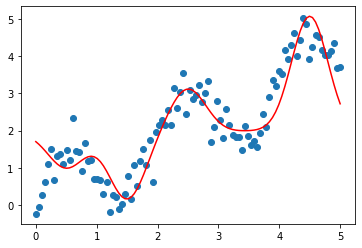

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [32]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.94457214 -1.7808232   1.18612884  0.04468467  3.13834774]
interception:  1.9370104976063571


#### Comparison

In [33]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

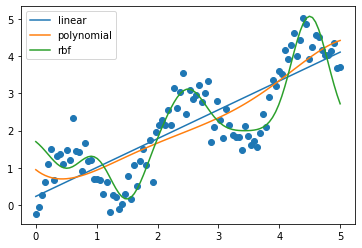

In [34]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [35]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5940669551458906


In [36]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5518189146756322


In [37]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.32596109689568925
